<h1 align ="center">General Stats for the model</h1>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
# Convert data to numpy arrays
X = X = np.load('/content/drive/MyDrive/Data/input_data.npy')
y = np.load('//content/drive/MyDrive/Data/output_labels.npy')
y = y.ravel()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=42)
# Train the Random Forest Classifier


In [14]:
import pickle
with open('/content/drive/MyDrive/Data/svm_model.pkl', 'rb') as f:
    SVM = pickle.load(f)
with open('/content/drive/MyDrive/Data/knn_model.pkl', 'rb') as f:
    KNN = pickle.load(f)
with open('/content/drive/MyDrive/Data/NN.pkl', 'rb') as f:
    NN = pickle.load(f)
with open('/content/drive/MyDrive/Data/random_forest.pkl', 'rb') as f:
    RF = pickle.load(f)
with open('/content/drive/MyDrive/Data/random_forest_pca.pkl', 'rb') as f:
    RF_pca = pickle.load(f)
selected_features = np.load('/content/drive/MyDrive/Data/selected_features.npy')

In [ ]:
def Rf_predicion(arr):
  a4 = RF_pca.transform(arr)
  a5 = a4[:, selected_features]
  return RF.predict(a5)

In [27]:
a = SVM.predict(X_test)
b = KNN.predict(X_test)
c = NN.predict(X_test)
d = Rf_predicion(X_test)
c = 2*c
majority = np.zeros_like(a)
#majority voting
majority[(a+b+c+d)>=3] = 1

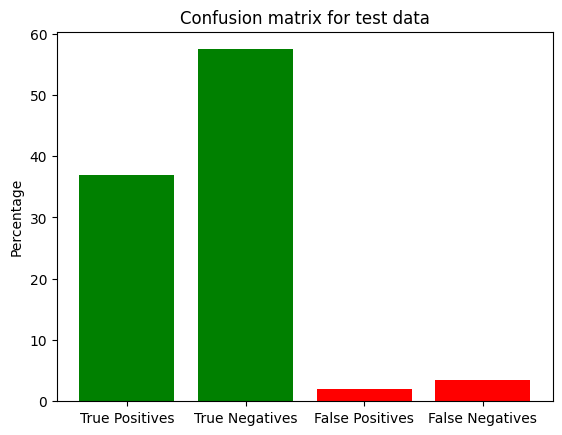

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_confusion_matrix(y_true, y_pred):
    true_positives =100* np.sum((y_true == 1) & (y_pred == 1))/y_true.shape[0]
    true_negatives =100* np.sum((y_true == 0) & (y_pred == 0))/y_true.shape[0]
    false_positives =100* np.sum((y_true == 0) & (y_pred == 1))/y_true.shape[0]
    false_negatives =100* np.sum((y_true == 1) & (y_pred == 0))/y_true.shape[0]
    return true_positives, true_negatives, false_positives, false_negatives

def plot_confusion_matrix(true_positives, true_negatives, false_positives, false_negatives,title):
    labels = ['True Positives', 'True Negatives', 'False Positives', 'False Negatives']
    values = [true_positives, true_negatives, false_positives, false_negatives]
    colors = ['green', 'green', 'red', 'red']

    plt.bar(labels, values, color=colors)
    plt.xlabel('')
    plt.ylabel('Percentage')
    plt.title(title)
    plt.show()

# Example usage
y_true = np.array([1, 0, 1, 0, 1])
y_pred = np.array([1, 1, 0, 0, 1])

true_positives, true_negatives, false_positives, false_negatives = (calculate_confusion_matrix(y_test, majority))
title = "Confusion matrix for test data"
plot_confusion_matrix(true_positives, true_negatives, false_positives, false_negatives,title)


In [29]:
a = SVM.predict(X_train)
b = KNN.predict(X_train)
c = NN.predict(X_train)
d = Rf_predicion(X_train)
c = 2*c
majority = np.zeros_like(a)
#majority voting
majority[(a+b+c+d)>=3] = 1

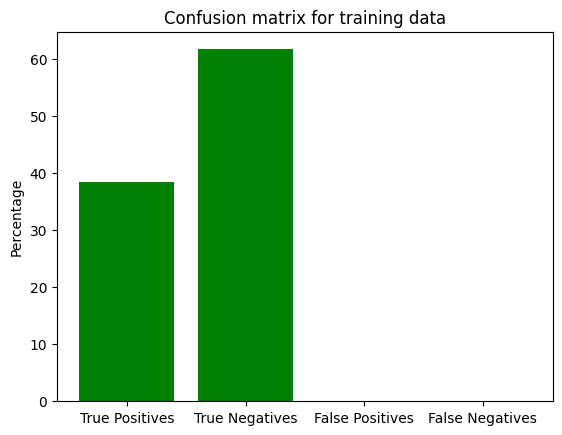

In [30]:

true_positives, true_negatives, false_positives, false_negatives = (calculate_confusion_matrix(y_train, majority))
title = "Confusion matrix for training data"
plot_confusion_matrix(true_positives, true_negatives, false_positives, false_negatives,title)


In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model):
    global X_train, y_train, X_test, y_test
    # Training predictions
    train_pred = model.predict(X_train)
    # Testing predictions
    test_pred = model.predict(X_test)

    # Compute metrics on training data
    train_accuracy = accuracy_score(y_train, train_pred)
    train_precision = precision_score(y_train, train_pred)
    train_recall = recall_score(y_train, train_pred)
    train_f1 = f1_score(y_train, train_pred)

    # Compute metrics on testing data
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)
    test_f1 = f1_score(y_test, test_pred)

    # Return the metrics
    return {
        'Train Accuracy': train_accuracy,
        'Train Precision': train_precision,
        'Train Recall': train_recall,
        'Train F1 Score': train_f1,
        '______________':'______________',
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1 Score': test_f1
    }


In [ ]:
evaluate_model(SVM)

{'Train Accuracy': 0.9582199076813824,
 'Train Precision': 0.9386391251518833,
 'Train Recall': 0.9534094415303919,
 'Train F1 Score': 0.9459666309505587,
 '______________': '______________',
 'Test Accuracy': 0.9229222520107239,
 'Test Precision': 0.9124579124579124,
 'Test Recall': 0.8958677685950414,
 'Test F1 Score': 0.9040867389491243}

In [ ]:
evaluate_model(KNN)

In [ ]:
evaluate_model(NN)

In [ ]:

def RF_evaluate_model():
    global X_train, y_train, X_test, y_test
    # Training predictions
    train_pred = model.predict(X_train)
    # Testing predictions
    test_pred = model.predict(X_test)

    # Compute metrics on training data
    train_accuracy = accuracy_score(y_train, train_pred)
    train_precision = precision_score(y_train, train_pred)
    train_recall = recall_score(y_train, train_pred)
    train_f1 = f1_score(y_train, train_pred)

    # Compute metrics on testing data
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)
    test_f1 = f1_score(y_test, test_pred)

    # Return the metrics
    return {
        'Train Accuracy': train_accuracy,
        'Train Precision': train_precision,
        'Train Recall': train_recall,
        'Train F1 Score': train_f1,
        '______________':'______________',
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1 Score': test_f1
    }
